In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  #cv
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('train_malware.csv')

In [5]:
df = df.astype("int64")
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

In [6]:
df.shape

(398, 331)

In [7]:
pd.Series.sort_values(df[df.type==1].sum(axis=0),ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

<AxesSubplot:>

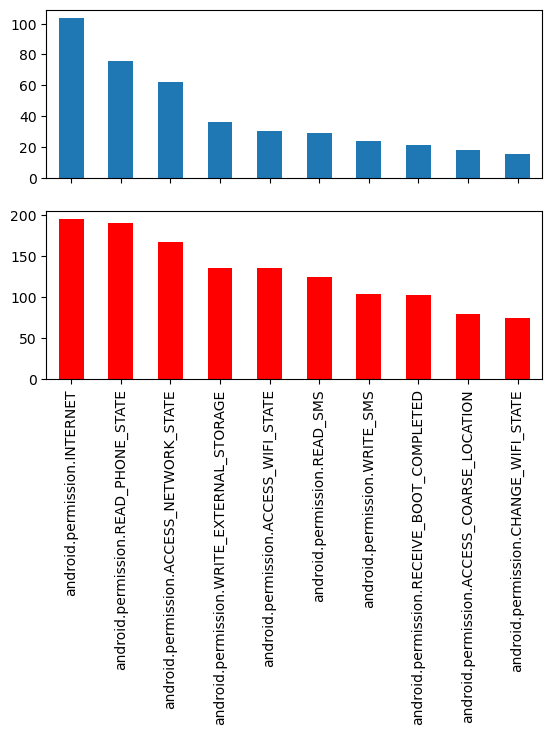

In [8]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=2, sharex=True)
pd.Series.sort_values(df[df.type==0].sum(axis=0),ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0),ascending=False)[1:11].plot.bar(ax=axs[1],color="red")

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:330],df['type'],test_size=0.20,random_state=42)

In [11]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [13]:
from sklearn import metrics
model3=metrics.accuracy_score(y_test,y_pred)
print(model3)

0.8375


In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

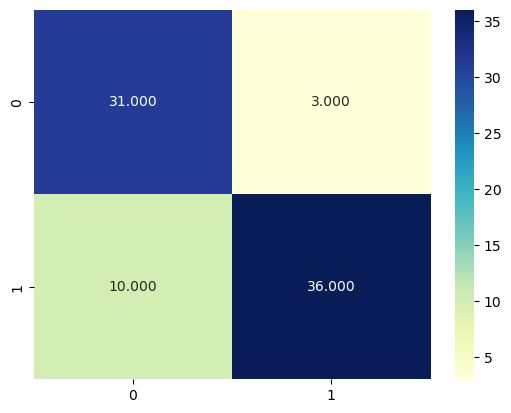

In [16]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test)
    
    accuracy = accuracy_score(pred,y_test)
    print(accuracy)
    print(classification_report(pred,y_test,labels=None))
    print("")

0.8875
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.85      0.95      0.90        41

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80


0.85
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.78      0.95      0.86        38

    accuracy                           0.85        80
   macro avg       0.86      0.85      0.85        80
weighted avg       0.87      0.85      0.85        80


0.8625
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.80      0.95      0.87        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

In [22]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier() 
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [23]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

0.9375


In [24]:
cnf_matrix = confusion_matrix(y_test,y_pred)

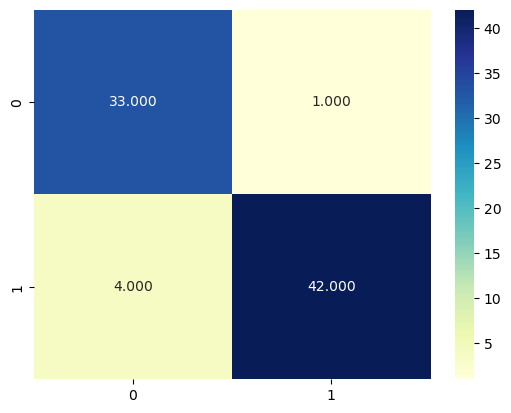

In [25]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [71]:
# Dynamic Analysis:
import pandas as pd
data = pd.read_csv("android_traffic.xls",sep=";")
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [72]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [73]:
data.shape

(7845, 17)

In [74]:
data.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [75]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [76]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,0.0,0.0,0.0,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,NaN,NaN,NaN,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,NaN,NaN,NaN,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,NaN,NaN,NaN,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,NaN,NaN,NaN,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,NaN,NaN,NaN,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,NaN,NaN,NaN,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,NaN,NaN,NaN,37150.000000,913.000000


<AxesSubplot:xlabel='tcp_urg_packet'>

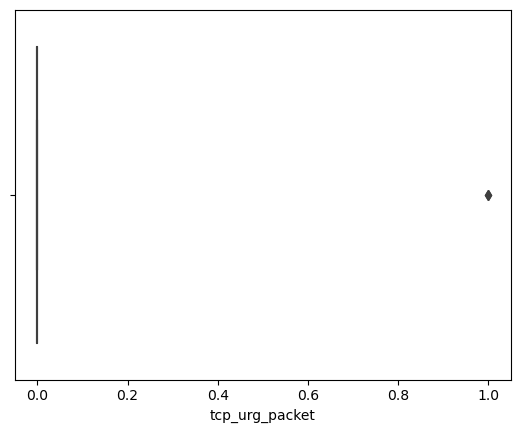

In [77]:
import seaborn as sns
sns.boxplot(data.tcp_urg_packet)

In [78]:
data.loc[data.tcp_urg_packet > 0].shape[0]

2

In [79]:
data = data.drop(columns=["tcp_urg_packet"],axis=1).copy()
data.shape

(7845, 16)

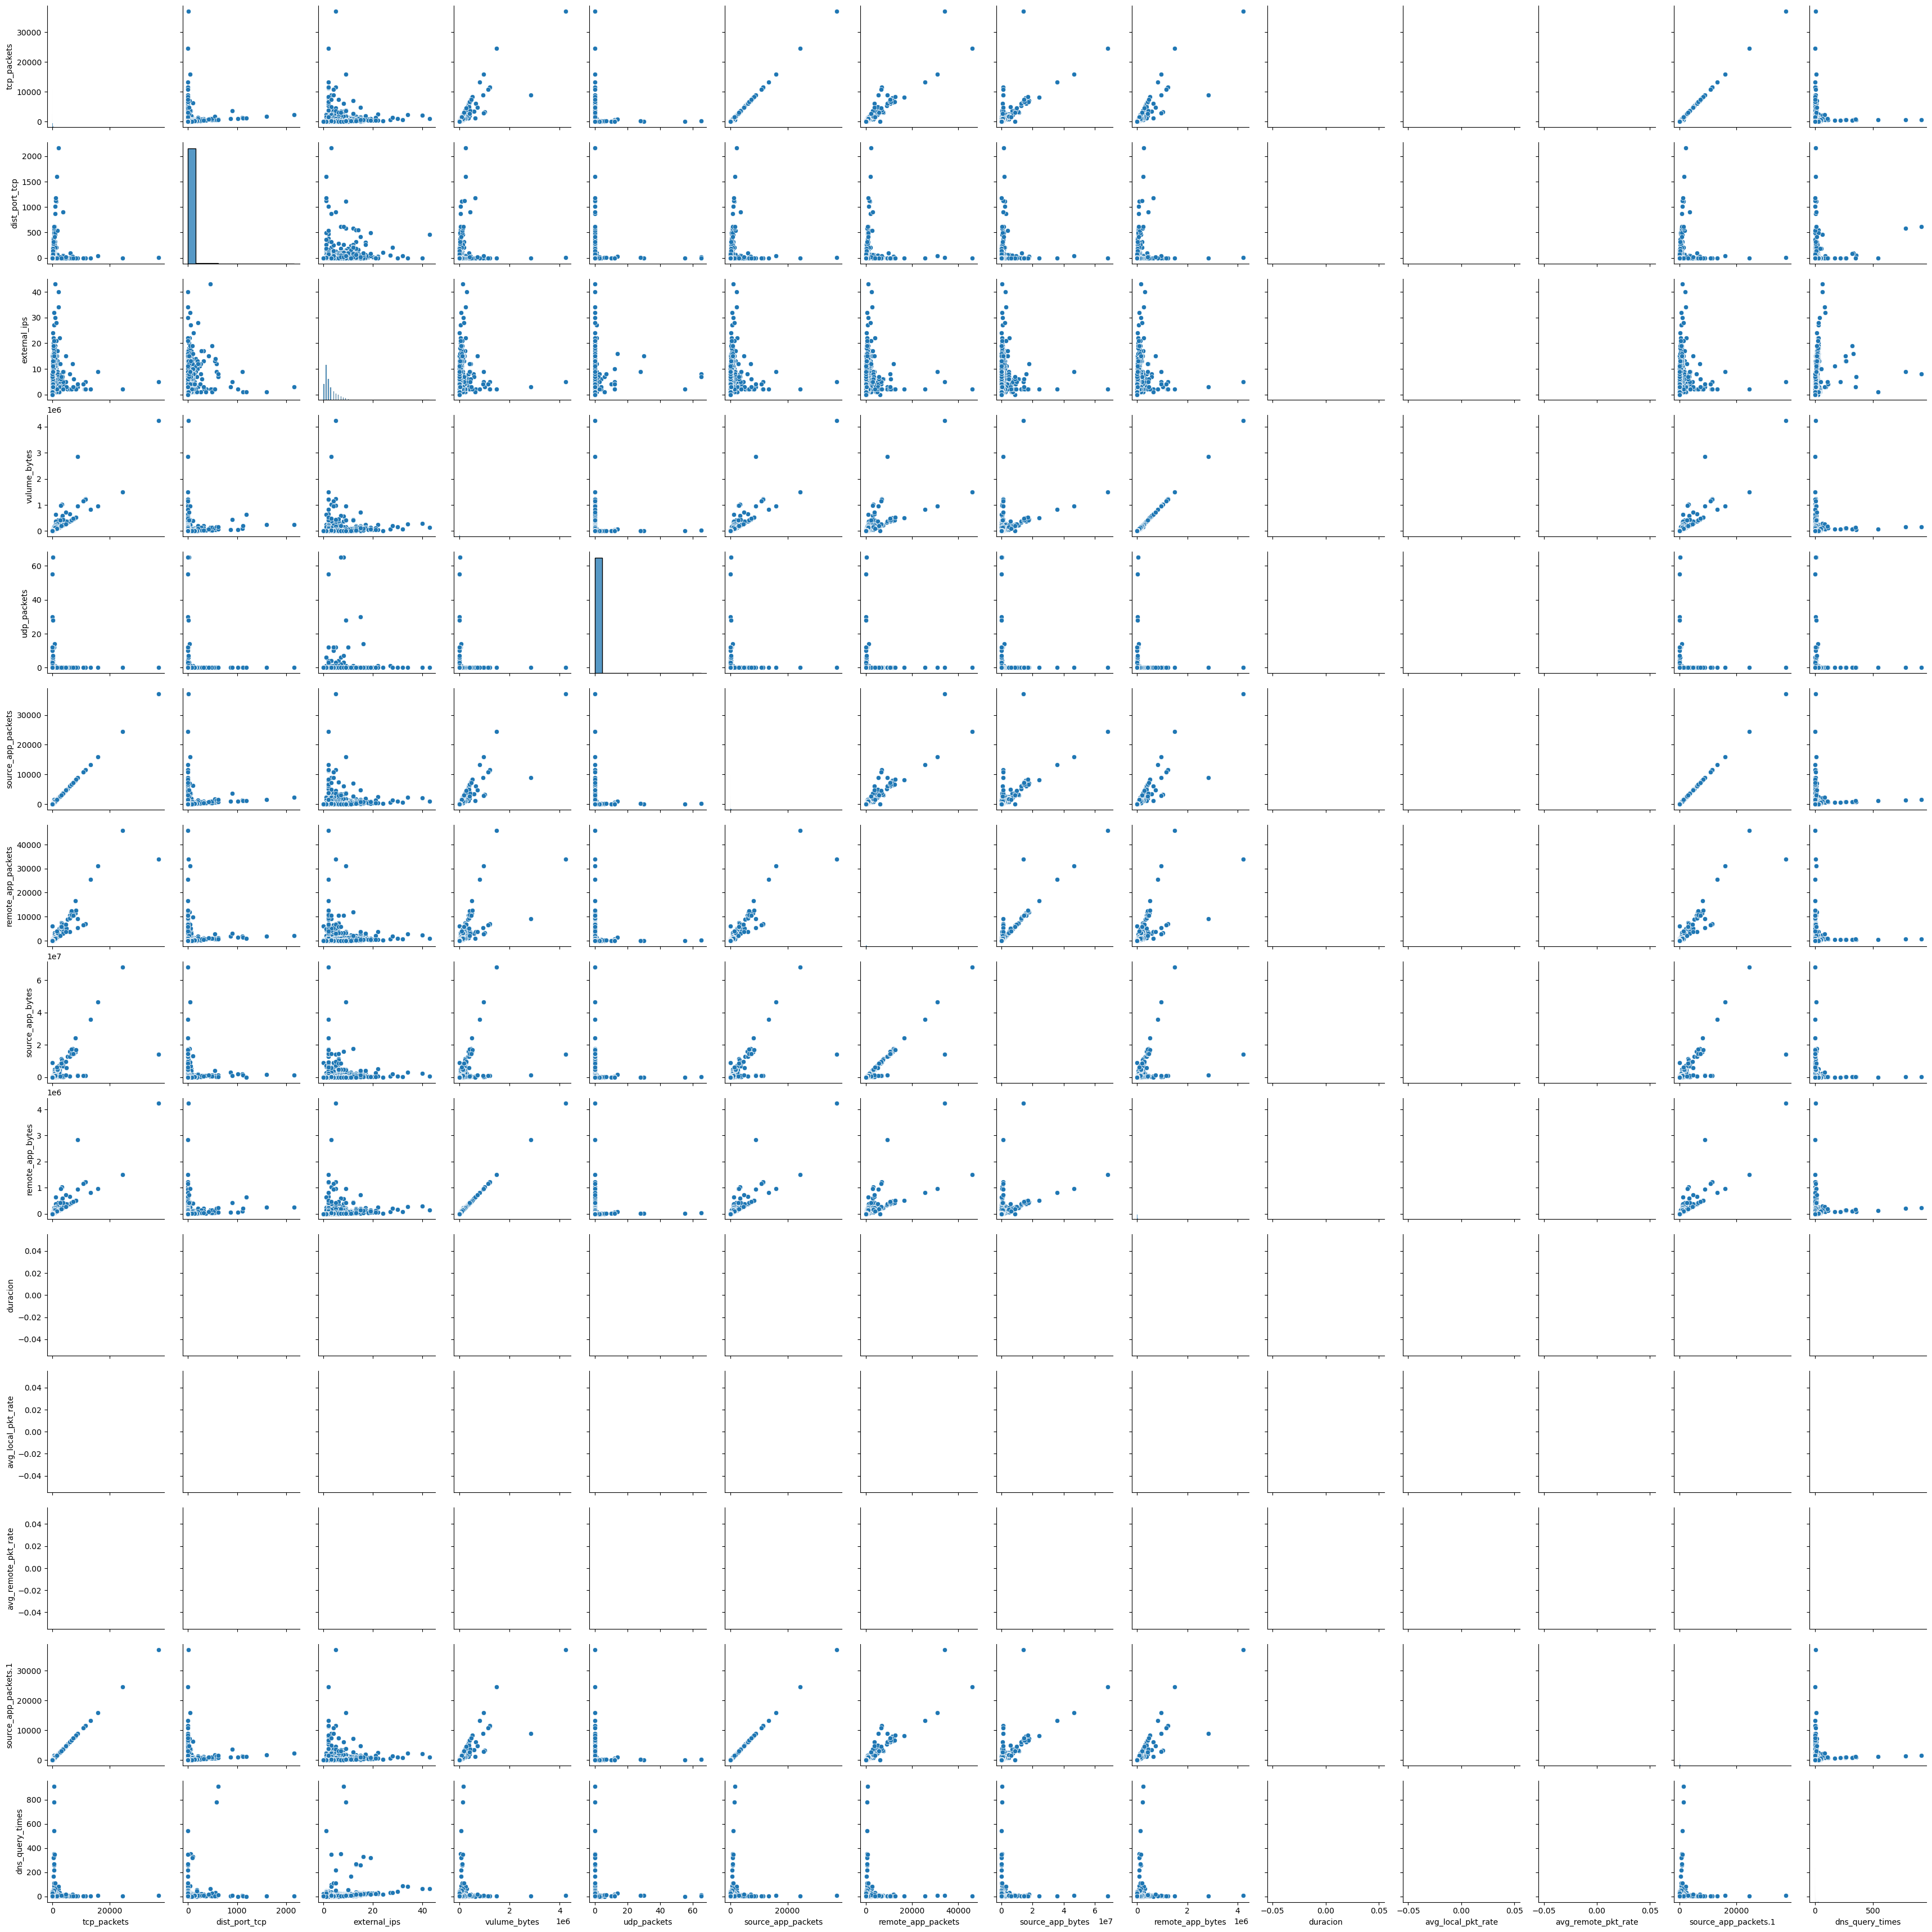

In [80]:
sns.pairplot(data)

In [81]:
data = data[data.tcp_packets<20000].copy()
data = data[data.dist_port_tcp<1400].copy()
data = data[data.external_ips<35].copy()
data = data[data.vulume_bytes<2000000].copy()
data = data[data.udp_packets<40].copy()
data = data[data.remote_app_packets<15000].copy()

In [82]:
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
duracion                                                              0.0
avg_local_pkt_rate                                                    0.0
avg_remote_pkt_rate                                                   0.0
source_app_packets.1                  

In [83]:
data = data.drop('source_app_packets.1',axis=1).copy()

In [89]:

from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
scaledData = scalar.fit_transform(data.iloc[:,1:10])
scaledData = pd.DataFrame(scaledData,columns=['tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'source_app_packets','remote_app_packets', 'source_app_bytes', 'remote_app_bytes'
       ])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10],data.type.astype("str"), test_size = 0.25, random_state=0)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test)
    
    accuracy = accuracy_score(pred,y_test)
    print(accuracy)
    print(classification_report(pred,y_test,labels=None))
    print("")



0.8810010214504597
              precision    recall  f1-score   support

      benign       0.90      0.90      0.90      1156
   malicious       0.85      0.86      0.86       802

    accuracy                           0.88      1958
   macro avg       0.88      0.88      0.88      1958
weighted avg       0.88      0.88      0.88      1958


0.8769152196118488
              precision    recall  f1-score   support

      benign       0.92      0.88      0.90      1212
   malicious       0.81      0.88      0.84       746

    accuracy                           0.88      1958
   macro avg       0.87      0.88      0.87      1958
weighted avg       0.88      0.88      0.88      1958


0.8544433094994893
              precision    recall  f1-score   support

      benign       0.89      0.86      0.88      1192
   malicious       0.80      0.84      0.82       766

    accuracy                           0.85      1958
   macro avg       0.85      0.85      0.85      1958
weighted avg   

In [92]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred


array(['malicious', 'malicious', 'malicious', ..., 'malicious',
       'malicious', 'malicious'], dtype='<U9')

In [93]:
from sklearn import metrics
model3=metrics.accuracy_score(y_test,y_pred)
print(model3)

0.47191011235955055


In [95]:
print(classification_report(pred,y_test,labels=None))
print("")

              precision    recall  f1-score   support

      benign       0.90      0.86      0.88      1207
   malicious       0.79      0.84      0.81       751

    accuracy                           0.85      1958
   macro avg       0.84      0.85      0.84      1958
weighted avg       0.85      0.85      0.85      1958


